 #### Dominant Color Extraction for Image Segmentation

Image Segmentation

Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects

We will try to extract the most dominant 'K' Colors using K-Means

We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

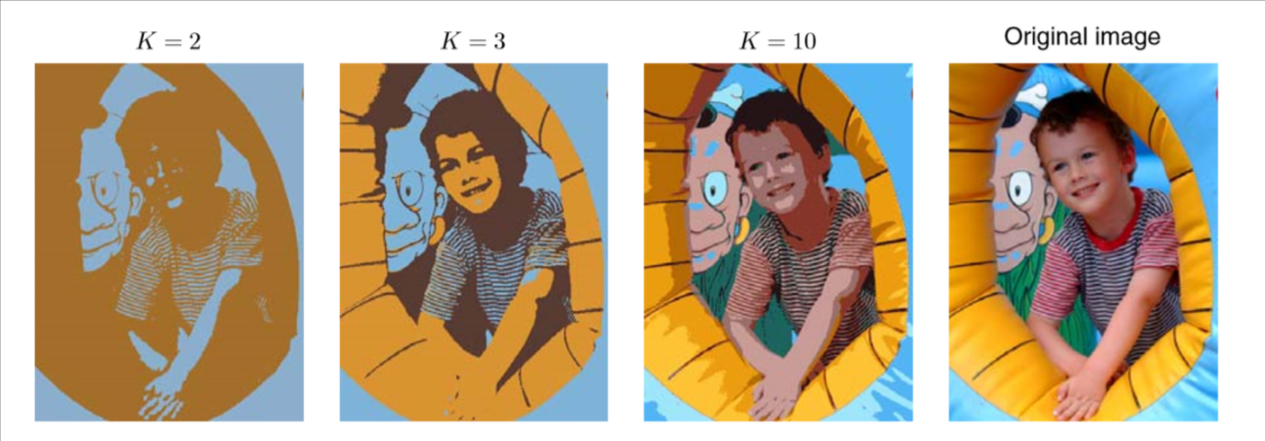

In [1]:
import matplotlib.pyplot as plt

In [22]:
import cv2
import numpy as np

In [5]:
im = cv2.imread('elephant.jpg') # reads an image into BGR 

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

original_shape = im.shape
print(im.shape)



(330, 500, 3)


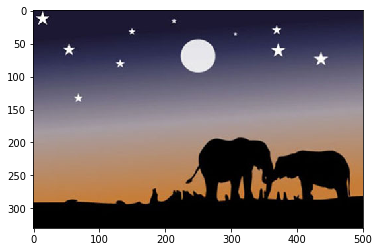

In [6]:
plt.imshow(im)
plt.show()

In [7]:

# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [9]:

from sklearn.cluster import KMeans

In [10]:

dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
centers = km.cluster_centers_

In [12]:
centers #RGB

array([[  1.49597475,   0.83632573,   1.15406   ],
       [174.77987421, 145.24855346, 128.25336478],
       [ 98.69372544,  94.85285947, 117.87183223],
       [ 38.01014671,  35.28635682,  64.49065646]])

In [23]:
centers = np.array(centers,dtype='uint8')

In [24]:
centers

array([[  1,   0,   1],
       [174, 145, 128],
       [ 98,  94, 117],
       [ 38,  35,  64]], dtype=uint8)

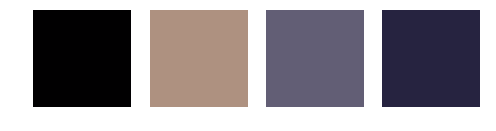

In [26]:
#ploting dominant colors
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

### segmenting our image

In [30]:
new_img = np.zeros((330*500,3),dtype='uint8')

print(new_img.shape)

(165000, 3)


In [31]:
colors

[array([1, 0, 1], dtype=uint8),
 array([174, 145, 128], dtype=uint8),
 array([ 98,  94, 117], dtype=uint8),
 array([38, 35, 64], dtype=uint8)]

In [32]:
km.labels_

array([3, 3, 3, ..., 0, 0, 0])

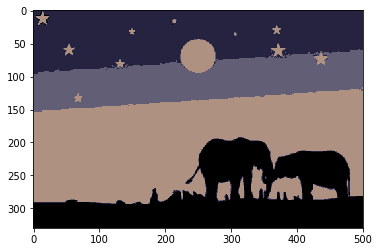

In [33]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()